 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [570]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [571]:
# Reading whale returns
csvpath = Path("../Downloads/whalereturns.csv")


whalereturns_dataframe = pd.read_csv(csvpath)
whalereturns_dataframe['Date'] = pd.to_datetime(whalereturns_dataframe['Date']).dt.date
whalereturns_dataframe = whalereturns_dataframe.set_index('Date')
whalereturns_dataframe = whalereturns_dataframe.sort_index(ascending=False)
whalereturns_dataframe.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-24,0.002284,0.001009,-0.004000,-0.006386
2019-04-23,0.007167,0.003485,0.006472,0.013278
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,0.001448,0.001222,0.000582,0.001916


In [572]:
# Count nulls
whalereturns_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [573]:
# Drop nulls
whalereturns_dataframe = whalereturns_dataframe.dropna().copy()
whalereturns_dataframe = whalereturns_dataframe.sort_index(ascending=False)


whalereturns_dataframe.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [574]:
# Reading algorithmic returns
# Reading whale returns
csvpath = Path("../Downloads/algoreturns.csv")

algo_returns_dataframe = pd.read_csv(csvpath)
algo_returns_dataframe['Date'] = pd.to_datetime(algo_returns_dataframe['Date']).dt.date
algo_returns_dataframe = algo_returns_dataframe.set_index('Date')
algo_returns_dataframe = algo_returns_dataframe.sort_index(ascending=False)
algo_returns_dataframe.head(20)

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247
2019-04-24,0.001095,0.000399
2019-04-23,0.004969,0.009622
2019-04-22,0.000677,-0.001936
2019-04-18,-0.000588,-0.001229


In [575]:
# Count nulls
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [576]:
# Drop nulls
algo_returns_dataframe = algo_returns_dataframe.dropna().copy()
algo_returns_dataframe

algo_returns_dataframe.head(20)

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247
2019-04-24,0.001095,0.000399
2019-04-23,0.004969,0.009622
2019-04-22,0.000677,-0.001936
2019-04-18,-0.000588,-0.001229


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [577]:
# Reading S&P 500 Closing Prices
csvpath = Path("../Downloads/sp500history.csv")

sp500_history_dataframe = pd.read_csv(csvpath)
sp500_history_dataframe['Date'] = pd.to_datetime(sp500_history_dataframe['Date']).dt.date
sp500_history_dataframe = sp500_history_dataframe.set_index('Date')
sp500_history_dataframe["Close"] = sp500_history_dataframe["Close"].str.replace("$", "")
sp500_history_dataframe = sp500_history_dataframe.sort_index(ascending=False)

sp500_history_dataframe.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [578]:
# Check Data Types
sp500_history_dataframe.dtypes

Close    object
dtype: object

In [579]:
# Fix Data Types

sp500_history_dataframe["Close"] = sp500_history_dataframe["Close"].astype("float")
sp500_history_dataframe.dtypes

Close    float64
dtype: object

In [580]:
# Calculate Daily Returns
daily_returns = sp500_history_dataframe.pct_change()

daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [581]:
# Drop nulls

sp500_history_dataframe["S&P Returns"] = daily_returns["Close"]
sp500_history_dataframe = sp500_history_dataframe.dropna().copy()
sp500_history_dataframe = sp500_history_dataframe.drop(columns=["Close"])

sp500_history_dataframe.head()

,S&P Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [582]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_dataframe = sp500_history_dataframe.rename(columns={
    "S&P Returns": "S&P 500 Returns"
})

sp500_history_dataframe.head()

,S&P 500 Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [584]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

Comparative_returns_df = pd.concat([sp500_history_dataframe,algo_returns_dataframe,whalereturns_dataframe], axis='columns', join='inner')
Comparative_returns_df


,S&P 500 Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
...,...,...,...,...,...,...,...
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

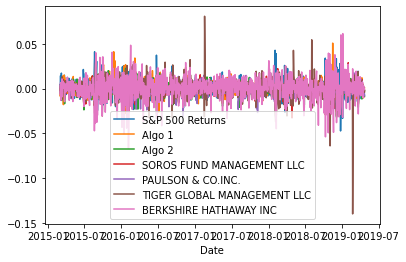

In [585]:
# Plot daily returns of all portfolios

Comparative_returns_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

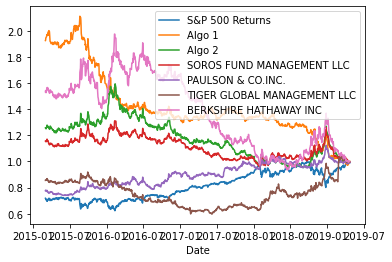

In [586]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all = (1 + Comparative_returns_df).cumprod()
cumulative_returns_all.head()

# Plot cumulative returns
cumulative_returns_all.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

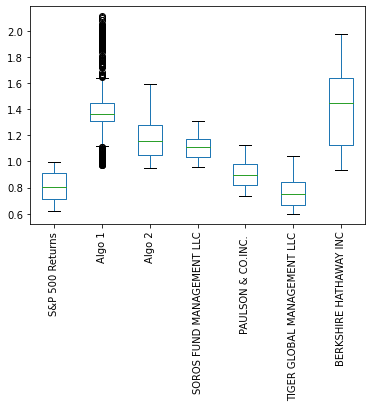

In [587]:
# Box plot to visually show risk
cumulative_returns_all.plot.box(widths=.5, rot=90)

### Calculate Standard Deviations

In [588]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = Comparative_returns_df.std()

daily_std_dev = daily_std_dev.sort_values(ascending=False)
daily_std_dev.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500 Returns                0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [589]:
# Calculate  the daily standard deviation of S&P 500
dsd_sp500 = sp500_history_dataframe.std()

dsd_sp500.head()

# Determine which portfolios are riskier than the S&P 500

riskier = daily_std_dev.loc[daily_std_dev > dsd_sp500]


ValueError: Can only compare identically-labeled Series objects

### Calculate the Annualized Standard Deviation

In [590]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
annualized_std_dev.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500 Returns                0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

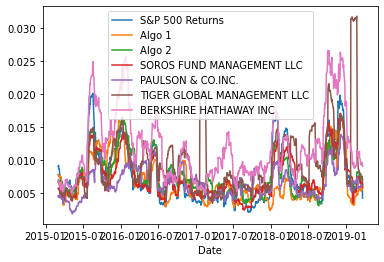

In [591]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

Comparative_returns_df.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

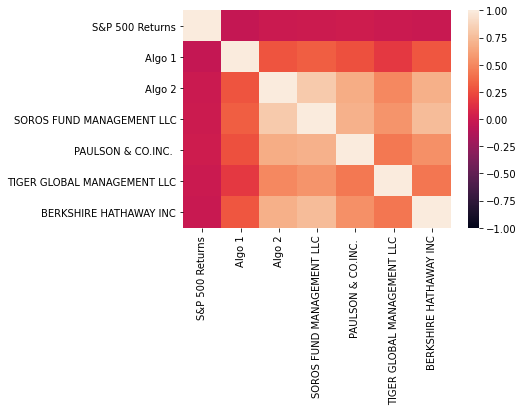

In [592]:
# Calculate the correlation
correlation = Comparative_returns_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [593]:
# Calculate covariance of a single portfolio

covariance = Comparative_returns_df['Algo 1'].cov(Comparative_returns_df['S&P 500 Returns'])
print(covariance)

# Calculate variance of S&P 500
variance = Comparative_returns_df['S&P 500 Returns'].var()
print(variance)

# Computing beta
algo_1_beta = covariance / variance

# Plot beta trend

algo_1_beta.plot(figsize=(20, 10), title='Algo 1 Beta')

-2.223042551715527e-06
7.373467552840446e-05


AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [594]:
# Use `ewm` to calculate the rolling window
Comparative_returns_df.ewm(halflife=21)


ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [595]:
# Annualized Sharpe Ratios
sharpe_ratios = (Comparative_returns_df.mean() * 252) / (Comparative_returns_df.std() * np.sqrt(252))
sharpe_ratios

S&P 500 Returns               -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

<AxesSubplot:>

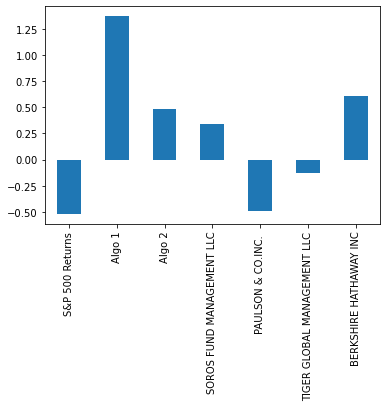

In [596]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both the Algo's beat the S&P 500, but only algo 1 beat Berkshire. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GBTC` - [Greyscale Bitcoin Trust](https://grayscale.co/bitcoin-trust/)

* `ETHE` - [Greyscale Ethereum Trust](https://grayscale.co/ethereum-trust/)

* `MMEDF` - [MindMed Theraputics](https://mindmed.co)

In [686]:
# Reading data from 1st stock
csvpath = Path("../Downloads/GBTC1YR.csv")

gbtc_df = pd.read_csv(csvpath)

gbtc_df['Date'] = pd.to_datetime(gbtc_df['Date']).dt.date
gbtc_df = gbtc_df.set_index('Date')
gbtc_df = gbtc_df.sort_index(ascending=False)
gbtc_df = gbtc_df.rename(columns={
    "Close": "GBTC Close"
})

gbtc_df.head()

,GBTC Close
Date,
2020-11-13,17.96
2020-11-12,18.24
2020-11-11,17.52
2020-11-10,16.51
2020-11-09,17.09


In [687]:
# Reading data from 2nd stock
csvpath = Path("../Downloads/ETHE1YR.csv")

ethe_df = pd.read_csv(csvpath)

ethe_df['Date'] = pd.to_datetime(ethe_df['Date']).dt.date
ethe_df = ethe_df.set_index('Date')
ethe_df = ethe_df.sort_index(ascending=False)
ethe_df = ethe_df.rename(columns={
    "Close": "ETHE Close"
})

ethe_df.head()

,ETHE Close
Date,
2020-11-13,63.56
2020-11-12,62.00
2020-11-11,63.74
2020-11-10,60.47
2020-11-09,60.23


In [688]:
# Reading data from 3rd stock
csvpath = Path("../Downloads/MMEDF1YR.csv")

mmedf_df = pd.read_csv(csvpath)

mmedf_df['Date'] = pd.to_datetime(mmedf_df['Date']).dt.date
mmedf_df = mmedf_df.set_index('Date')
mmedf_df = mmedf_df.sort_index(ascending=False)
mmedf_df = mmedf_df.rename(columns={
    "Close": "MMEDF Close"
})

mmedf_df.head()

,MMEDF Close
Date,
2020-11-13,0.91
2020-11-12,0.89
2020-11-11,0.90
2020-11-10,0.86
2020-11-09,0.95


In [704]:
# Combine all stocks in a single DataFrame
ryans_picks_df = pd.concat([gbtc_df, ethe_df,mmedf_df], axis='columns', join='inner')
ryans_picks_df.head(10)


,GBTC Close,ETHE Close,MMEDF Close
Date,,,
2020-11-13,17.96,63.56,0.91
2020-11-12,18.24,62.00,0.89
2020-11-11,17.52,63.74,0.90
2020-11-10,16.51,60.47,0.86
2020-11-09,17.09,60.23,0.95
2020-11-06,17.54,60.25,0.91
2020-11-05,17.27,56.34,0.97
2020-11-04,15.87,52.70,0.91
2020-11-03,15.42,53.00,0.82


In [705]:
# Reset Date index


In [706]:
# Reorganize portfolio data by having a column per symbol
ryans_picks_df.head()

,GBTC Close,ETHE Close,MMEDF Close
Date,,,
2020-11-13,17.96,63.56,0.91
2020-11-12,18.24,62.00,0.89
2020-11-11,17.52,63.74,0.90
2020-11-10,16.51,60.47,0.86
2020-11-09,17.09,60.23,0.95


In [708]:
# Calculate daily returns
ryans_picks_dreturns = ryans_picks_df.pct_change()
# Drop NAs
ryans_picks_dreturns = ryans_picks_dreturns.dropna().copy()
# Display sample data
ryans_picks_dreturns.head(20)


,GBTC Close,ETHE Close,MMEDF Close
Date,,,
2020-11-12,0.015590,-0.024544,-0.021978
2020-11-11,-0.039474,0.028065,0.011236
2020-11-10,-0.057648,-0.051302,-0.044444
2020-11-09,0.035130,-0.003969,0.104651
2020-11-06,0.026331,0.000332,-0.042105
2020-11-05,-0.015393,-0.064896,0.065934
2020-11-04,-0.081065,-0.064608,-0.061856
2020-11-03,-0.028355,0.005693,-0.098901
2020-11-02,0.005837,0.042830,-0.024390


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [709]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

ryans_returns = ryans_picks_dreturns.dot(weights)


# Display sample data
ryans_returns.head()

Date
2020-11-12   -0.010311
2020-11-11   -0.000058
2020-11-10   -0.051132
2020-11-09    0.045271
2020-11-06   -0.005147
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [711]:
# Join your returns DataFrame to the original returns DataFrame
showdown_df = pd.concat([ryans_picks_dreturns,Comparative_returns_df], axis='columns', join='inner')              
showdown_df.head()




,GBTC Close,ETHE Close,MMEDF Close,S&P 500 Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,,,


In [695]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
ryans_picks_df = ryans_picks_df.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [607]:
# Calculate the annualized `std`

daily_std_dev_2 = showdown_df.std()




daily_std_dev_2 = daily_std_dev_2.sort_values(ascending=False)
daily_std_dev_2.head()

annualized_std_dev_2 = daily_std_dev_2 * np.sqrt(252)
annualized_std_dev_2.head(20)

GBTC Close                    NaN
ETHE Close                    NaN
MMEDF Close                   NaN
S&P 500 Returns               NaN
Algo 1                        NaN
Algo 2                        NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [608]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [609]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [610]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [611]:
# Calculate Annualzied Sharpe Ratios


In [612]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!